In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=17

In [8]:
import tensorflow as tf
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/sportslogo 2.v1i.tensorflow',shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 1122 files belonging to 2 classes.


In [10]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=10)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
model=DenseNet121(include_top=False, input_shape=(224,224,3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
for layer in model.layers[:-7]:
  layer.trainable=False

In [15]:
flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(2, activation='softmax')(flattened_fc_layer)

In [16]:
model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 701ms/step - accuracy: 0.8189 - loss: 13.1731 - val_accuracy: 0.6042 - val_loss: 16.6975
Epoch 2/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8888 - loss: 1.1688 - val_accuracy: 0.9062 - val_loss: 4.3204
Epoch 3/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9225 - loss: 0.7019 - val_accuracy: 0.9167 - val_loss: 1.4895
Epoch 4/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9569 - loss: 0.2474 - val_accuracy: 0.9479 - val_loss: 0.3771
Epoch 5/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9516 - loss: 0.3271 - val_accuracy: 0.9479 - val_loss: 0.6190
Epoch 6/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9531 - loss: 0.2354 - val_accuracy: 0.9479 - val_loss: 0.3514
Epoch 7/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9774 - loss: 0.1036 - val_accuracy: 0.9583 - val_loss: 0.1436
Epoch 8/17
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9808 - loss: 0.0679 - val_accuracy: 0.968

In [19]:
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9945 - loss: 0.0678


In [20]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

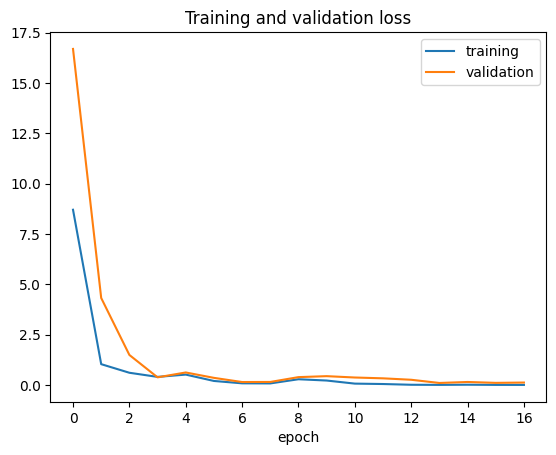

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

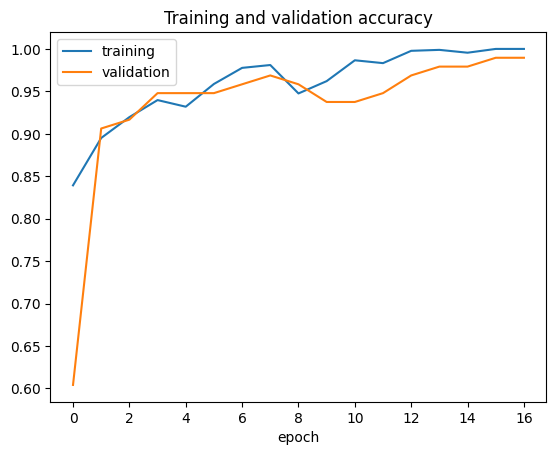

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [23]:
model.save('fakeProduct.h5')

In [24]:
import pickle

In [25]:
pickle.dump(model, open('model.pkl','wb'))

# **Testing**

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the trained model
model_path = 'fakeProduct.h5'  # Replace 'path_to_your_model.h5' with the actual path
model = tf.keras.models.load_model(model_path)

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Path to the input image you want to test
input_image_path = '/content/drive/MyDrive/sportslogo 2.v1i.tensorflow/train/101_png_jpg.rf.439d304735d2f5edccb4b506cadab687.jpg'  # Replace 'path_to_your_input_image.jpg' with the actual path
input_image = preprocess_image(input_image_path)

# Use the model to predict the class of the input image
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)

# Define class labels
class_labels = ['Real', 'Fake']

# Print the predicted class label
print("Predicted class:", class_labels[predicted_class])

# Ground truth label (if available)
# Replace 'ground_truth_label' with the actual ground truth label (0 for Real, 1 for Fake)
results = model.evaluate(dataset)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
y_true = []
y_pred = []
for images, labels in dataset:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
Predicted class: Fake
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 431ms/step - accuracy: 0.9877 - loss: 0.2176
Test Loss: 0.2887156307697296
Test Accuracy: 0.9821746945381165
